## XGBoost Regression

### XGBoost
#### XGBoost is an implementation of Gradient Boosted decision trees.  Decision trees are created in sequential form, weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.  These individual classifiers/predictors then ensemble to give a strong and more precise model

#### Pros 
- less manipulation needed
- focused on computational speed and model performance
- can handle large datasets 
- can handle missing values
- less influenced by outliers in the data
- no assumptions about underlying distributions in the data
- can implicitly handle collinearity in features, highly similar features 
- work well with categorical and numerical features, mixing different range values 

#### Cons
- robust algorithm makes it more complex tougher to analyze small details 
- not best to determine feature and target relationships/effects due to working with highly similar features

### Model Set Up

#### Steps
 - load the data
 - inspect, clean, organize data
 - check for, handle outliers 
 - encode data if necessary 
 - set features and target 
 - train, test split the data 
 - scale the data if necessary 
 - build the model, fit on the data, run the model
 - run metrics, analyze, view results, adjust parameters, repeat until satisfied... 


### Regression Models

#### XGBoost Classification 
1 dependent variable (interval or ratio) , 1+ independent variables (interval or ratio or categorical)
 - generate reasonable predictions across a wide range of data while requiring little configuration




### Models

#### Import + Inspect 

In [1]:
### imports ###
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/CS_Notes/main/Regression_Notes/medical_insurance.csv') # read in the file 
print('data frame shape:', df.shape) 
df.head() 

data frame shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
### inspecting the data ###
print('--- INSPECTING THE DATA --- ')
print('--- columns --- ')
print(df.columns) 
print('--- types --- ')
print(df.dtypes) 
print('--- NA counts --- ')
print(df.isna().sum()) 
print('--- object descriptions --- ')
print(df.describe(include=object))
print('--- numericals descriptions --- ')
df.describe()

--- INSPECTING THE DATA --- 
--- columns --- 
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
--- types --- 
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
--- NA counts --- 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
--- object descriptions --- 
         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364
--- numericals descriptions --- 


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
### view basic feature correlations ###
print('--- feature correlations ---')
df.corr()

--- feature correlations ---


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


--- feature correlations heatmap ---


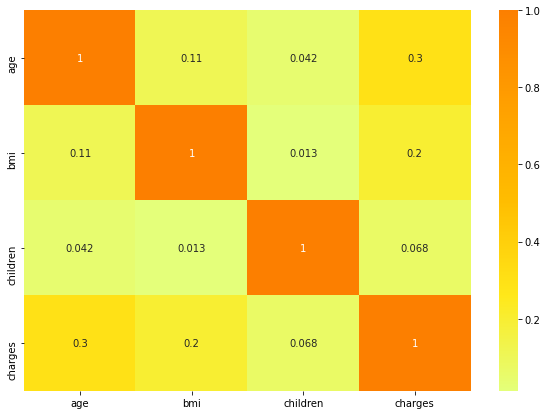

In [4]:
### view basic feature correlations in a heatmap ###
import seaborn as sns 
import matplotlib.pyplot as plt 
f, ax = plt.subplots(1, 1, figsize = (10, 7))
print('--- feature correlations heatmap ---')
sns.heatmap(df.corr() , cmap = 'Wistia' , annot = True)

--- scatter plots ---


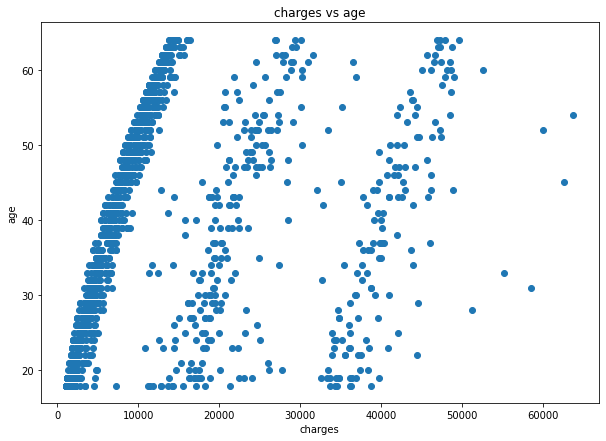

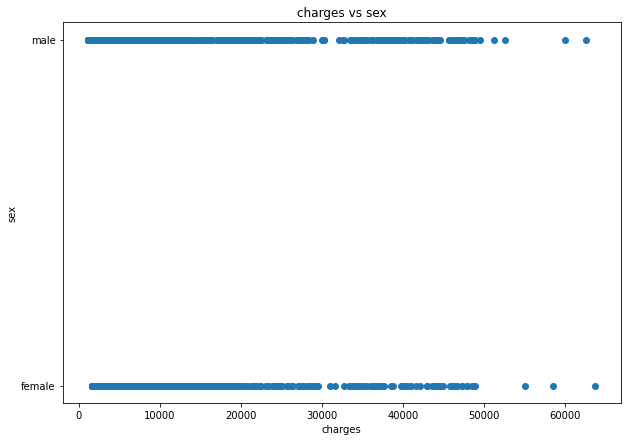

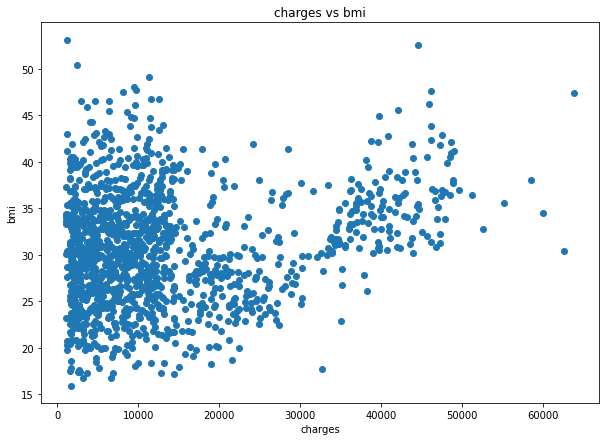

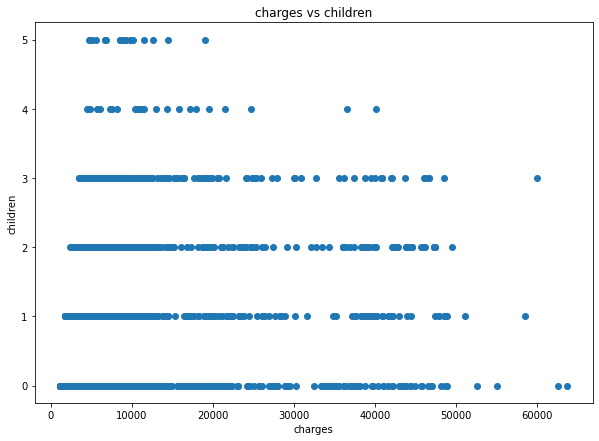

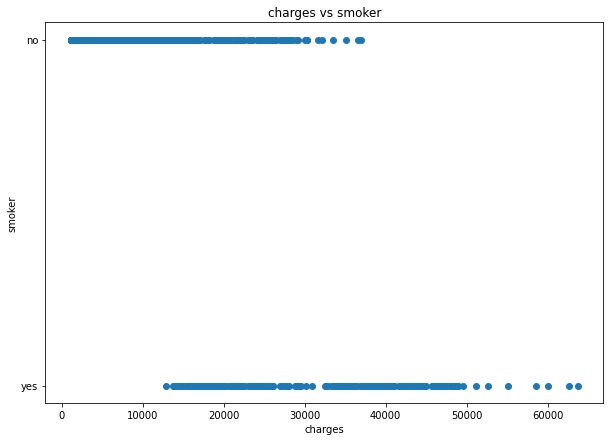

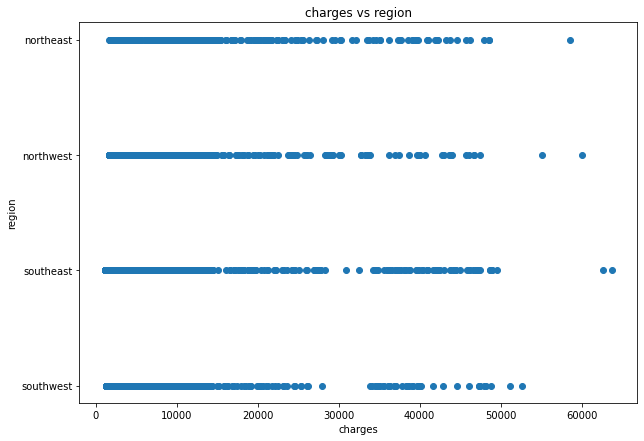

In [5]:
### view scatter plots for each feature vs. target ###
import matplotlib.pyplot as plt 
target_ = 'charges' # set the target
features_ = df.iloc[:, 0:6] # set the features
print('--- scatter plots ---')
for feature in features_:
    figure = plt.figure
    f, ax = plt.subplots(1, 1, figsize = (10, 7))
    ax = plt.gca()
    ax.scatter(df[target_], df[feature])
    ax.set_xlabel(target_)
    ax.set_ylabel(feature)
    ax.set_title(f'''{target_} vs {feature}''')
    plt.show()

#### Encode + Clean + Organize 





In [6]:
### use label encoder on the data frame ###
# encoding for 'sex', 'smoker', 'region'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].apply(le.fit_transform) 
print('data frame shape:', df.shape)
df.head() 

data frame shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Figure size 432x288 with 0 Axes>

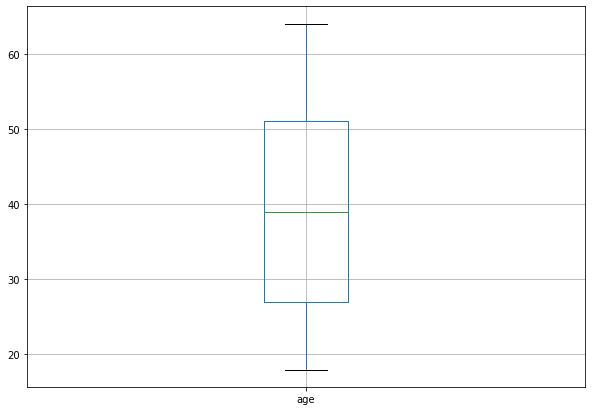

<Figure size 432x288 with 0 Axes>

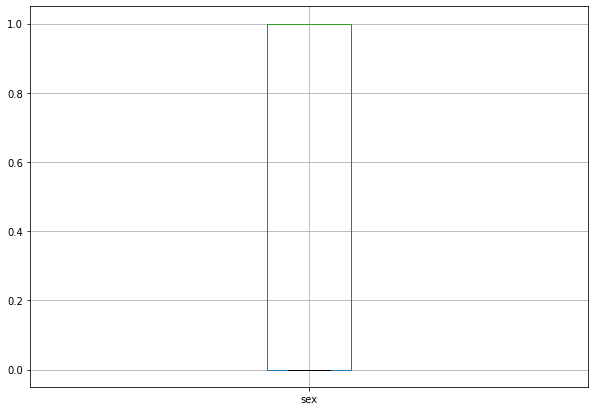

<Figure size 432x288 with 0 Axes>

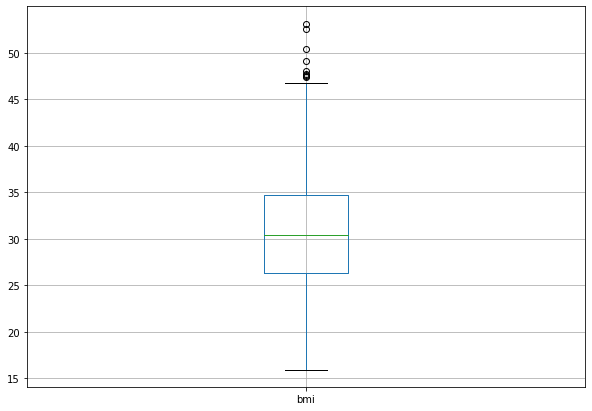

<Figure size 432x288 with 0 Axes>

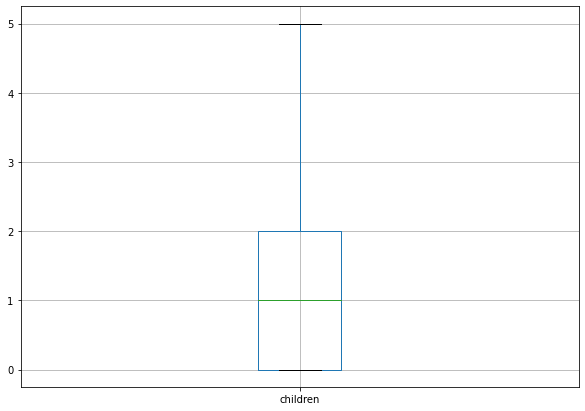

<Figure size 432x288 with 0 Axes>

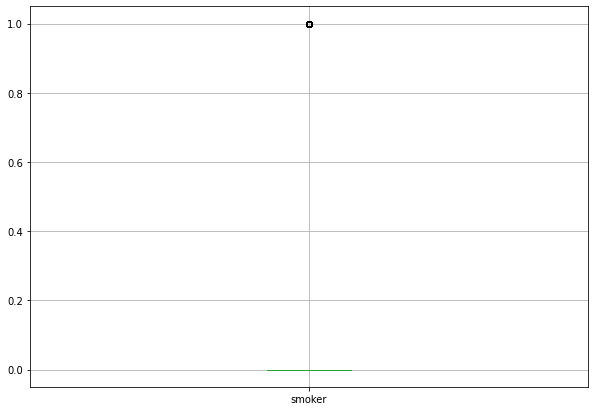

<Figure size 432x288 with 0 Axes>

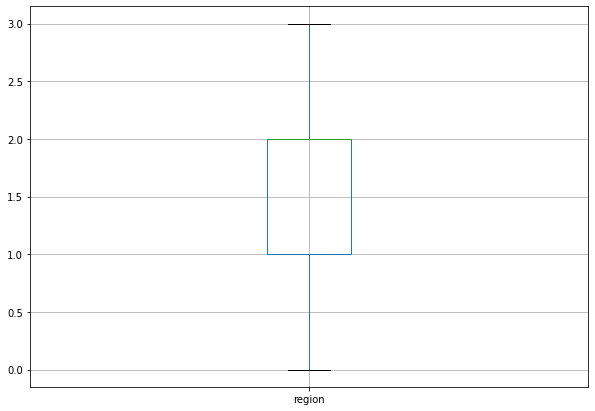

<Figure size 432x288 with 0 Axes>

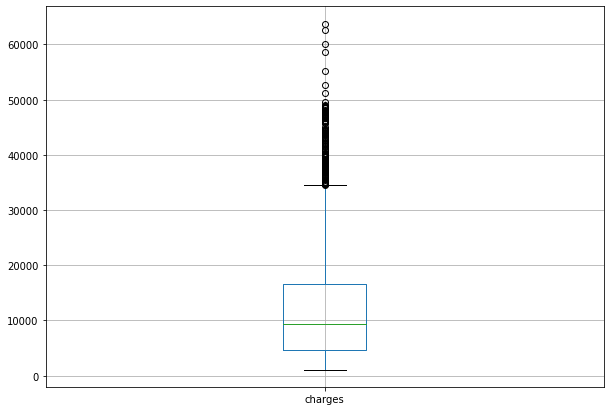

In [7]:
### check for outliers in the data ### 
import matplotlib.pyplot as plt
# view each feature in a boxplot 
for column in df:
    plt.figure() # plot figure 
    f, ax = plt.subplots(1, 1, figsize = (10, 7))
    df.boxplot([column]) # set data

In [8]:
### function to find outliers in the data ###
def outlier_zscore(data):
    global outliers,zscore
    outliers = [] 
    zscore = [] 
    threshold = 3.5 # set threshold 
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std # calculate the z_score
        zscore.append(z_score) # append the score to the zscore
        if np.abs(z_score) > threshold: 
            outliers.append(i) # append z_score the outliers
    print(outliers)
    return len(outliers), outliers

In [9]:
### run each feature 'wanted' through the function ### 
print('--- possible outliers --- ')
age_outliers_number, age_outliers = outlier_zscore(df.age)
sex_outliers_number, sex_outliers = outlier_zscore(df.sex)
bmi_outliers_number, bmi_outliers = outlier_zscore(df.bmi)
children_outliers_number, children_outliers = outlier_zscore(df.children)
smoker_outliers_number, smoker_outliers = outlier_zscore(df.smoker)
region_outliers_number, region_outliers = outlier_zscore(df.region)
charges_outliers_number, charges_outliers = outlier_zscore(df.charges)


--- possible outliers --- 
[]
[]
[52.58, 53.13]
[]
[]
[]
[63770.42801, 58571.074479999996, 60021.39897, 62592.87309]


In [10]:
### removal of outliers per feature ###
for num, i in enumerate(df['bmi']): 
    if i in bmi_outliers:
        df['bmi'][num] = 48.5 # choose replacement score
for num, i in enumerate(df['charges']): 
    if i in charges_outliers:
        df['charges'][num] = 55000.00 # choose replacement score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


#### XGBoost Regression
 - GridSearchCV
 - RandomizedSearch CV

In [14]:
### copy the data frame ###
df1 = df.copy()

In [15]:
### split the data into features & target sets ###
X = df1.iloc[:, 0:6].values # set the features
y = df1.iloc[:, 6].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1338, 6)
y shape: (1338,)


In [16]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 

In [17]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [19]:
### XGBoost regression model ###
import xgboost as xgb 
from sklearn import metrics
model = xgb.XGBRegressor()
print('--- model runtime --- ')
%time model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) 
df_final = pd.concat([y_test_df , y_pred_df] , axis=1)
print('--- real values vs predicted values ---') 
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') 
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
[21:51:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 50.9 ms, sys: 963 µs, total: 51.9 ms
Wall time: 51.7 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000      12182.335938
1   8547.69130       9926.038086
2  45702.02235      46371.992188
3  12950.07120      13901.026367
4   9644.25250      10526.208984
--- model metrics ---
mean absolute error: 2388.173032668551
mean squared error: 16077362.948037058
root mean squared error: 4009.658707176592
r2 score : 0.8989670913420329
model score: 0.8933742090968199
model accuracy: 89.89670913420329%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


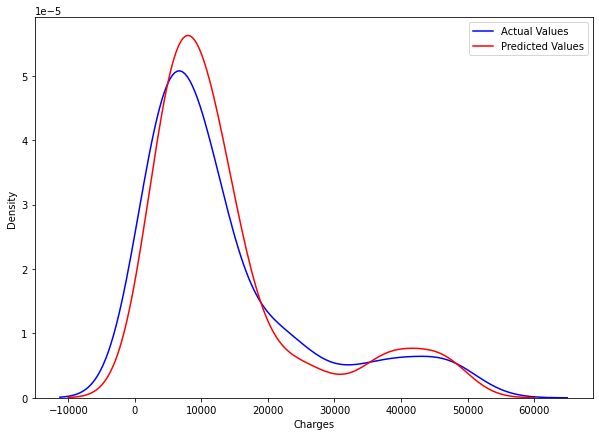

In [20]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

##### GridSearch CV

In [21]:
### copy the data frame ###
df2 = df.copy()

In [22]:
### split the data into features & target sets ###
X = df2.iloc[:, 0:6].values # set the features
y = df2.iloc[:, 6].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape)
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1338, 6)
y shape: (1338,)


In [23]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20

In [25]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [31]:
### XGBoost + grid search CV model ###
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
model1 = xgb.XGBRegressor()
param_grid = {  # create the param grid 
            # 'base_score': 0.5,
            # 'booster': 'gbtree',
            # 'colsample_bylevel': 1,
            # 'colsample_bynode': 1,
            # 'colsample_bytree': 1,
            # 'gamma': 0,
            'learning_rate': [0.1, 0.5, 0.75],
            # 'max_delta_step': 0,
            'max_depth': [3, 10, 20],
            # 'min_child_weight': 1,
            # 'missing': None,
            'n_estimators': [10, 100, 200],
            # 'n_jobs': 1,
            # 'nthread': None,
            'objective': ['reg:squarederror'],
            # 'random_state': 0,
            # 'reg_alpha': 0,
            # 'reg_lambda': 1,
            # 'scale_pos_weight': 1,
            # 'seed': None,
            # 'silent': None,
            # 'subsample': 1,
            # 'verbosity': 1
              }
CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 8.54 s, sys: 171 ms, total: 8.71 s
Wall time: 8.73 s
--- best params --- 


{'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 10,
 'objective': 'reg:squarederror'}

In [33]:
### XGBoost regression model + grid best params ###
import xgboost as xgb 
from sklearn import metrics
model1 = xgb.XGBRegressor(
                          learning_rate= 0.5, 
                          max_depth= 3, 
                          n_estimators= 10
                          )
print('--- model runtime --- ')
%time model1.fit(X_train, y_train) 
y_pred = model1.predict(X_test) 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) 
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) 
print('--- real values vs predicted values ---') 
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---') 
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model1.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
[22:00:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 10.6 ms, sys: 32 µs, total: 10.7 ms
Wall time: 10.2 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000      11816.898438
1   8547.69130       9802.083984
2  45702.02235      45528.105469
3  12950.07120      14350.306641
4   9644.25250      10651.940430
--- model metrics ---
mean absolute error: 2360.944091658757
mean squared error: 15752794.83042561
root mean squared error: 3968.9790665139076
r2 score : 0.9010067331095237
model score: 0.8794871996853431
model accuracy: 90.10067331095237%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


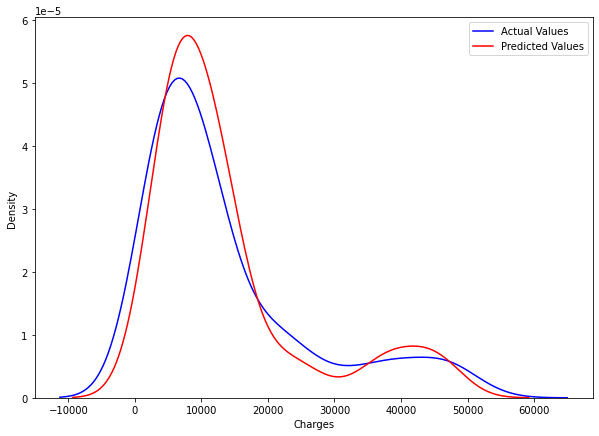

In [34]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()

##### RandomizedSearch CV

In [35]:
### copy the data frame ###
df3 = df.copy()

In [36]:
### split the data into features & target sets ###
X = df3.iloc[:, 0:6].values # set the features
y = df3.iloc[:, 6].values # set the target 
print('--- data shapes --- ')
print('X shape:', X.shape) 
print('y shape:', y.shape) 

--- data shapes --- 
X shape: (1338, 6)
y shape: (1338,)


In [37]:
### set the train test split parameters ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split 80/20 

In [38]:
### feature scaling ### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # initiate the scalar   
X_train = sc.fit_transform(X_train) # fit transform the data with scalar
X_test = sc.transform(X_test) # fit transform the data with scalar

In [39]:
### XGBoost + randomized search CV model ###
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
model2 = xgb.XGBRegressor()
param_grid = {  # create the param grid 
            # 'base_score': 0.5,
            # 'booster': 'gbtree',
            # 'colsample_bylevel': 1,
            # 'colsample_bynode': 1,
            # 'colsample_bytree': 1,
            # 'gamma': 0,
            'learning_rate': [0.1, 0.5, 0.75],
            # 'max_delta_step': 0,
            'max_depth': [3, 10, 20],
            # 'min_child_weight': 1,
            # 'missing': None,
            'n_estimators': [10, 100, 200],
            # 'n_jobs': 1,
            # 'nthread': None,
            'objective': ['reg:squarederror'],
            # 'random_state': 0,
            # 'reg_alpha': 0,
            # 'reg_lambda': 1,
            # 'scale_pos_weight': 1,
            # 'seed': None,
            # 'silent': None,
            # 'subsample': 1,
            # 'verbosity': 1
              }
CV_rfc = RandomizedSearchCV(model2, param_grid, cv=3) 
print('--- model runtime --- ')
%time CV_rfc.fit(X_train, y_train)
print('--- best params --- ')
CV_rfc.best_params_

--- model runtime --- 
CPU times: user 2.88 s, sys: 42 ms, total: 2.92 s
Wall time: 2.93 s
--- best params --- 


{'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 10,
 'objective': 'reg:squarederror'}

In [41]:
### XGBoost regression model + randomized best params ###
import xgboost as xgb
from sklearn import metrics
model2 = xgb.XGBRegressor(
                      learning_rate= 0.5, 
                      max_depth= 3, 
                      n_estimators= 10
                      )
print('--- model runtime --- ')
%time model2.fit(X_train, y_train)
y_pred = model2.predict(X_test) 
#### create data frame of predictions and results ### 
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted_Values" ]) 
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real_Values"]) 
df_final = pd.concat([y_test_df , y_pred_df] , axis=1) 
print('--- real values vs predicted values ---')
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---')
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred)) # mae 
print('mean squared error:', metrics.mean_squared_error(y_test, y_pred)) # mse 
print('root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # rmse
score = metrics.r2_score(y_test , y_pred) # get the r2 score 
print("r2 score : {}".format(score)) # show the r2 score
print('model score:', model2.score(X_train, y_train)) # show the model score 
print("model accuracy: {}%".format(score * 100)) # show the model accuracy

--- model runtime --- 
[22:03:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 10.4 ms, sys: 0 ns, total: 10.4 ms
Wall time: 10.4 ms
--- real values vs predicted values ---
   Real_Values  Predicted_Values
0   9724.53000      11816.898438
1   8547.69130       9802.083984
2  45702.02235      45528.105469
3  12950.07120      14350.306641
4   9644.25250      10651.940430
--- model metrics ---
mean absolute error: 2360.944091658757
mean squared error: 15752794.83042561
root mean squared error: 3968.9790665139076
r2 score : 0.9010067331095237
model score: 0.8794871996853431
model accuracy: 90.10067331095237%


--- distplot accuracy --- 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


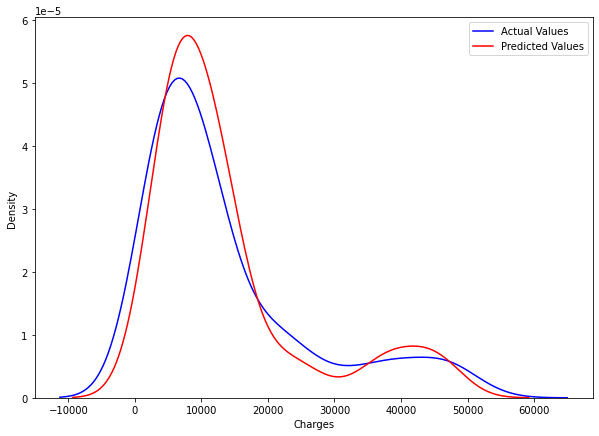

In [42]:
### visualize the model prediction accuracy ###
import seaborn as sns
import matplotlib.pyplot as plt
### configure the plot ###
print('--- distplot accuracy --- ')
f, ax = plt.subplots(1, 1, figsize = (10, 7))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Values")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , axlabel='Charges', ax=ax1)
plt.legend()